In [368]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
model_list = [
    "NovaSky-AI/Sky-T1-32B-Preview",
    "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    # "Qwen/Qwen2.5-Math-1.5B-Instruct",
    # "Qwen/Qwen2.5-Math-7B-Instruct",
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "microsoft/phi-4",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct"
]

In [369]:
# PROMP_LIST = [ "-c2f-budget", "-aav-budget", "-sbs-budget", "-aav-budget-hard", "-c2f-budget-hard", "-sbs-budget-hard"]

# findings1
# PROMP_LIST = [ "-c2f", "-sbs", "-aav", "-sbs-hard", "-c2f-hard", "-aav-hard"]
# PROMP_LIST = [ "-c2f","-c2f-hard"]
# PROMP_LIST = [ "-sbs","-sbs-hard"]
PROMP_LIST = [ "-aav","-aav-hard"]

# findings2
# PROMP_LIST = [ "-c2f", "-sbs", "-aav"]

# findings3
# PROMP_LIST = [ "-c2f", "-sbs", "-aav", "-sbs-budget", "-aav-budget", "-c2f-budget"]

# PROMP_LIST = [ "-aav", "-c2f","-sbs-budget-hard"]
# PROMP_LIST = [ "-aav-budget", "-c2f-budget"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    # "internlm/internlm2_5-1_8b-chat": "internlm",
    # "internlm/internlm2_5-7b-chat": "internlm",
    # "internlm/internlm2_5-20b-chat": "internlm",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

In [370]:
def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                # for i in range(600, 1201, 100):
                #     budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 100):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)

        
        return budget_list

In [371]:
dataset = "gsm8k"   
something = "_-1_seed0_t0.0_s0_e-1"

In [372]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-aav': [39.3,
   46.6,
   59.2,
   69.5,
   77.9,
   83.7,
   88.5,
   91.1,
   92.6,
   93.8,
   94.6,
   94.5,
   94.9,
   95.0,
   95.1,
   94.8,
   95.1],
  'qwen-aav-hard': [2.0,
   4.7,
   13.9,
   18.6,
   20.5,
   20.2,
   22.4,
   24.2,
   28.0,
   29.0,
   32.3,
   36.7,
   46.4,
   56.0,
   63.8,
   71.3,
   77.1]},
 'Qwen/QwQ-32B-Preview': {'qwen-aav': [38.5,
   40.3,
   45.6,
   49.5,
   53.1,
   60.9,
   66.9,
   73.3,
   78.1,
   81.0,
   84.8,
   88.4,
   91.1,
   93.1,
   94.0,
   94.6,
   94.9],
  'qwen-aav-hard': [1.9,
   3.5,
   7.8,
   12.6,
   11.7,
   15.4,
   22.9,
   24.9,
   26.4,
   28.1,
   30.5,
   33.5,
   41.3,
   46.9,
   56.9,
   61.8,
   66.9]},
 'Qwen/Qwen2.5-32B-Instruct': {'qwen-aav': [41.9,
   57.6,
   73.8,
   81.0,
   86.1,
   88.8,
   90.5,
   91.7,
   92.9,
   93.7,
   94.0,
   94.4,
   94.8,
   95.0,
   95.1,
   95.2,
   95.2,
   95.1],
  'qwen-aav-hard': [2.6,
   9.4,
   24.7,
   20.1,
   13.8,
   12.2,

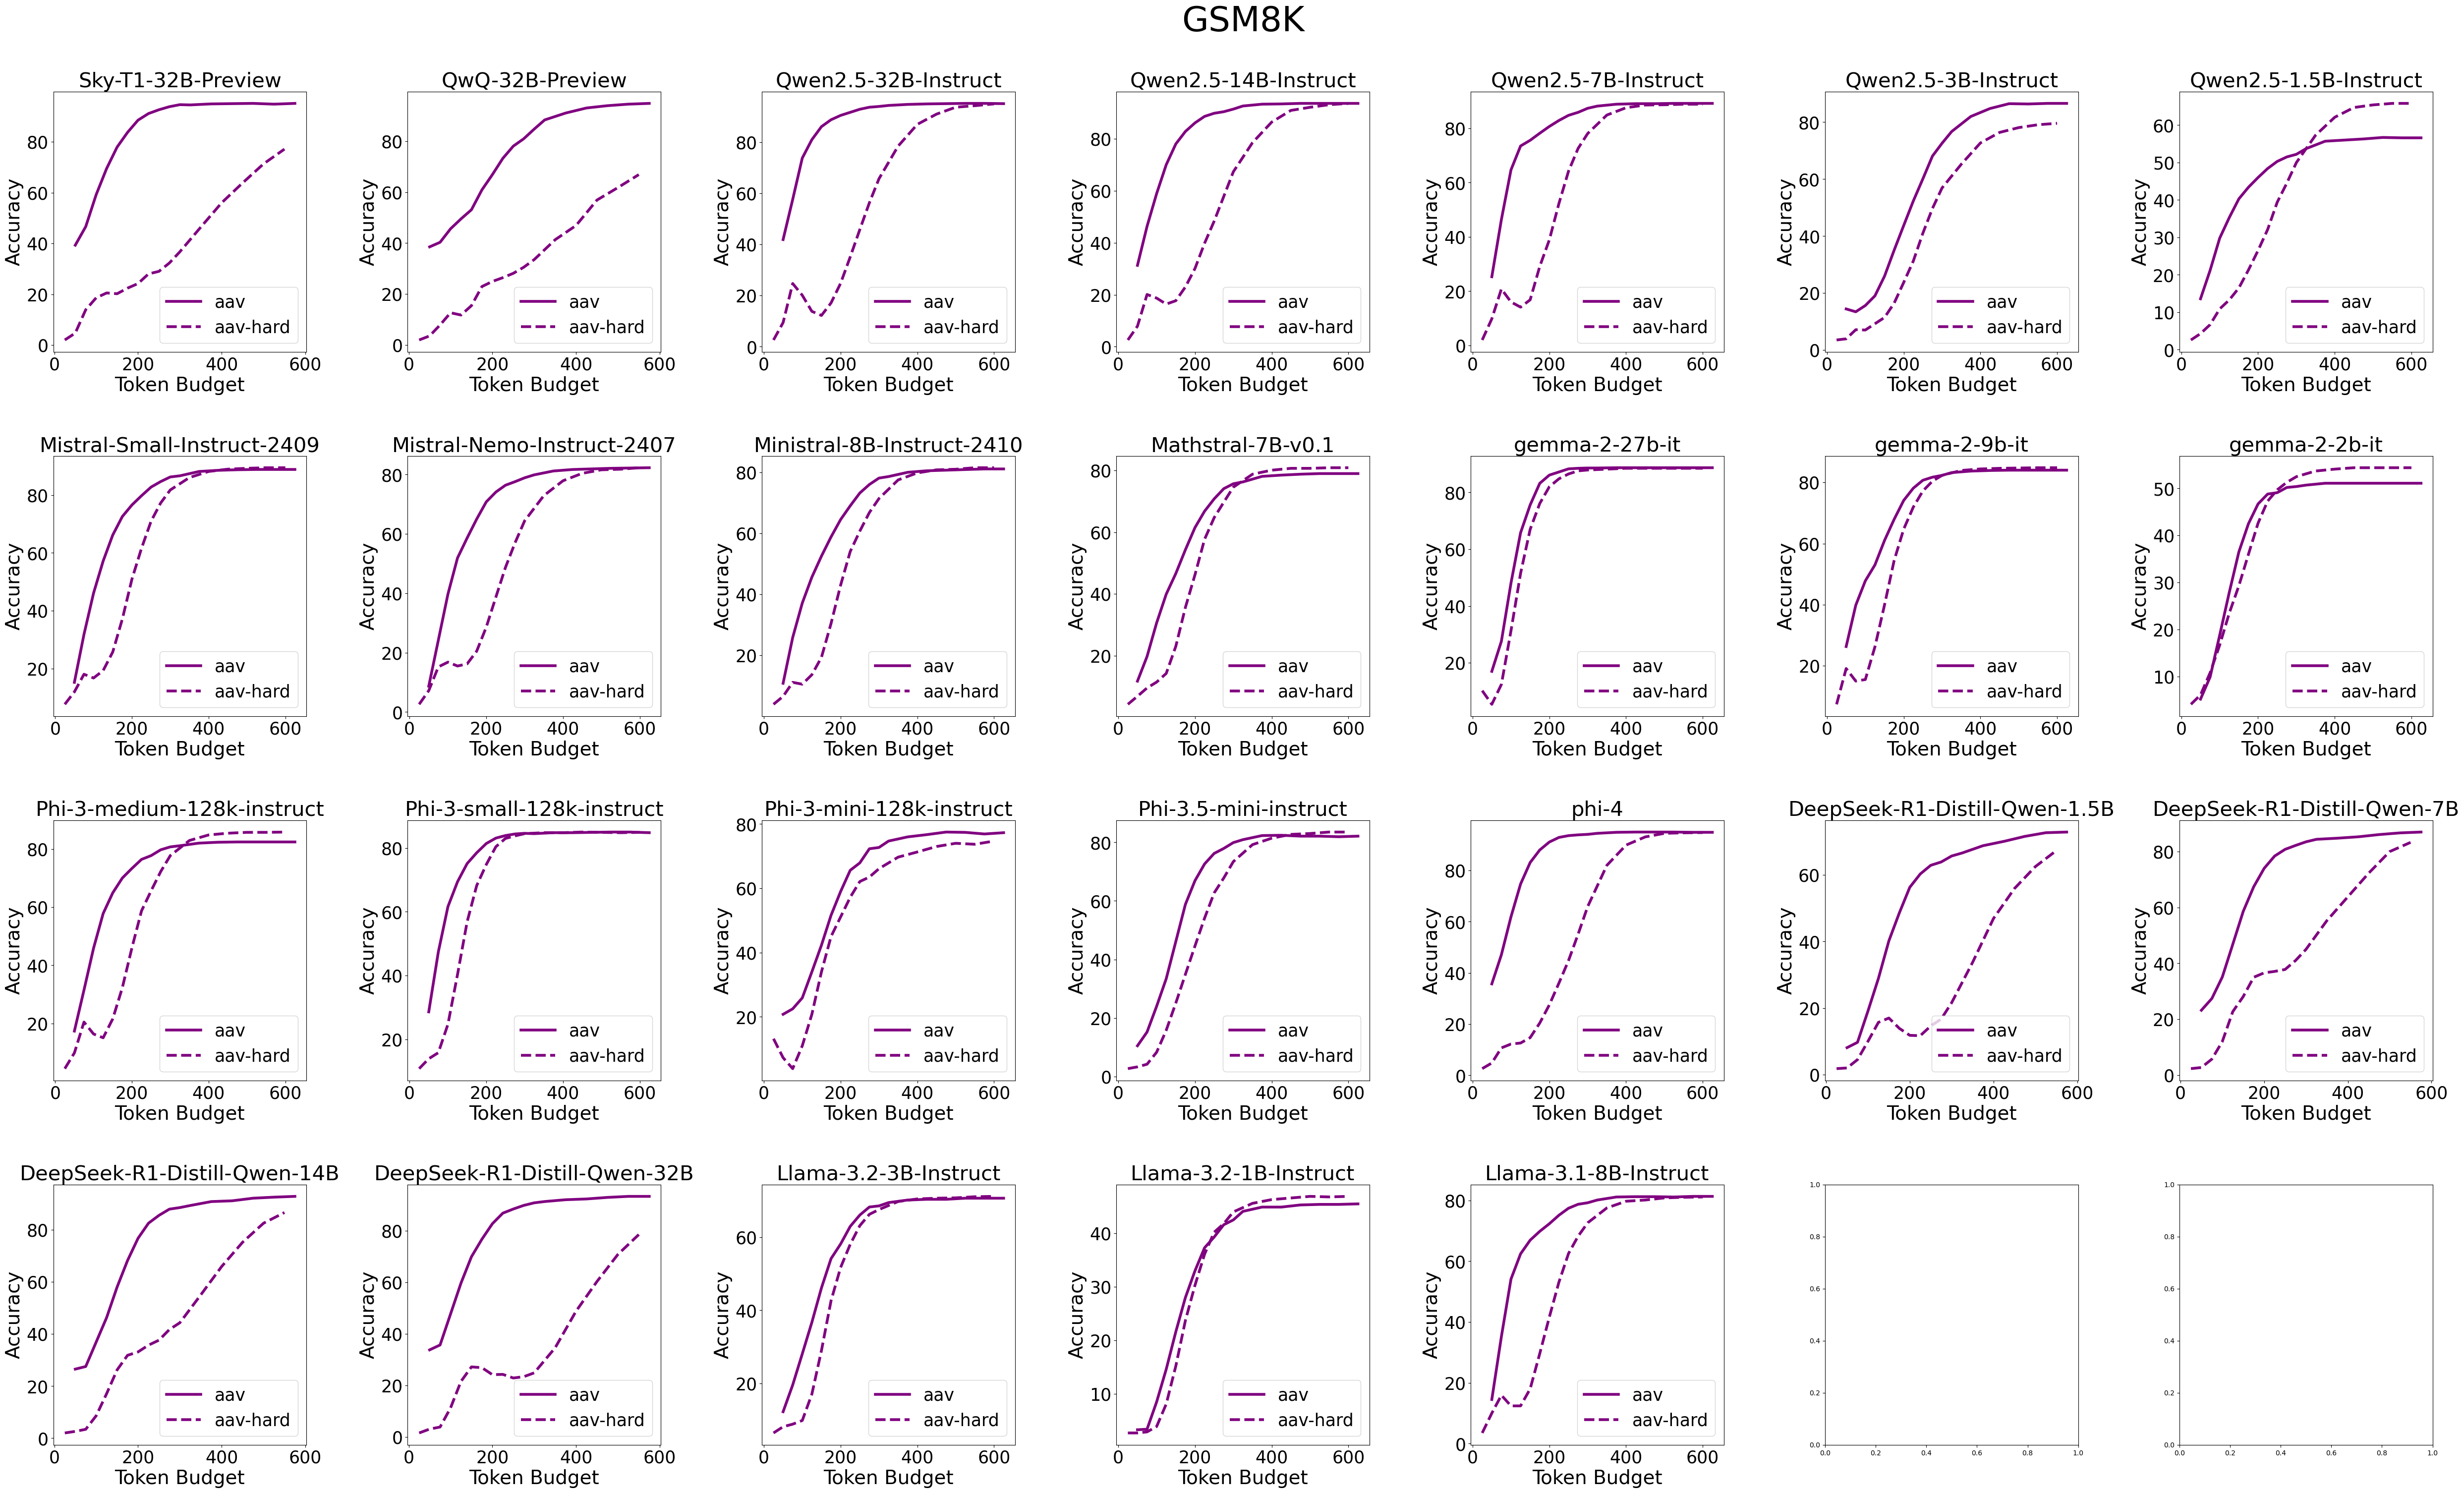

In [373]:
# Create a 2x3 subplot
fig, axs = plt.subplots(4,7, figsize=(60, 35))
line_width = 4   # Set the desired line width
line_shape = {
    "hard": "--",
    "budget": "-.",
    "else": "-"
}
color = {
    "sbs": "red",
    "c2f": "green",
    "aav": "purple"
}
# set the title
fig.suptitle(f"{dataset}".upper(), fontsize=50, y=0.93)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot all lines first without labels
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    
    for prompt_type in model_prompt_list:
        if "sbs-budget-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=':', color="red", label="sbs-budget-hard", linewidth=line_width)
        elif "c2f-budget-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=':', color="green", label="c2f-budget-hard", linewidth=line_width)
        elif "aav-budget-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=':', color="purple", label="aav-budget-hard", linewidth=line_width)
        elif "sbs-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
            
        elif "sbs-budget" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle=':', color="red", label="sbs-budget", linewidth=line_width)
        elif "c2f-budget" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle=':', color="green", label="c2f-budget", linewidth=line_width)
        elif "aav-budget" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle=':', color="purple", label="aav-budget", linewidth=line_width)
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget", fontsize=28)
        axs[index].set_ylabel("Accuracy", fontsize=28)
        axs[index].set_title(f"{model.split('/')[-1]}", fontsize=30)
        axs[index].legend(fontsize=25)
        
        # Set y-axis and x-axis ticks
        # axs[index].set_yticks(range(0, 101, 10))  # Set y-axis interval to 10
        axs[index].tick_params(axis='both', which='major', labelsize=25)
        # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50



# Adjust layout
plt.tight_layout()
# fig.subplots_adjust(top=0.9)
plt.subplots_adjust(
    left=0.1,      # Left margin
    right=0.9,     # Right margin
    bottom=0.1,    # Bottom margin
    top=0.88,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.4     # Height spacing between subplots
)
plt.savefig("gsm8k.pdf")   

In [374]:
dataset = "math500"   
something = "_-1_seed0_t0.0_s0_e-1"

In [375]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-aav': [36.8,
   36.0,
   39.2,
   40.0,
   44.6,
   48.0,
   50.6,
   53.6,
   55.2,
   56.2,
   60.2,
   61.2,
   62.8,
   63.2,
   64.4,
   65.8,
   69.0,
   69.0,
   70.8,
   70.0,
   71.8,
   72.0,
   73.4,
   73.6,
   75.2,
   76.6,
   78.4,
   80.4,
   81.2,
   82.2,
   83.0,
   82.8,
   84.0,
   84.2,
   83.8,
   84.2,
   83.6,
   84.4,
   84.6,
   84.6,
   85.4,
   84.8],
  'qwen-aav-hard': [2.6,
   3.8,
   5.6,
   5.4,
   7.6,
   9.8,
   10.6,
   9.4,
   10.0,
   13.0,
   12.6,
   13.4,
   16.0,
   15.6,
   20.4,
   21.8,
   21.8,
   25.0,
   28.0,
   28.6,
   30.4,
   32.4,
   33.4,
   38.0,
   44.4,
   49.6,
   56.4,
   59.2,
   61.8,
   65.6,
   68.6,
   68.8,
   69.8,
   71.0,
   73.8,
   75.8,
   78.2,
   78.0,
   79.0,
   79.0,
   79.4,
   79.2]},
 'Qwen/QwQ-32B-Preview': {'qwen-aav': [35.0,
   36.6,
   35.2,
   37.0,
   37.2,
   37.2,
   39.8,
   42.6,
   43.6,
   45.6,
   48.2,
   49.4,
   52.2,
   55.0,
   54.8,
   56.8,
   58.

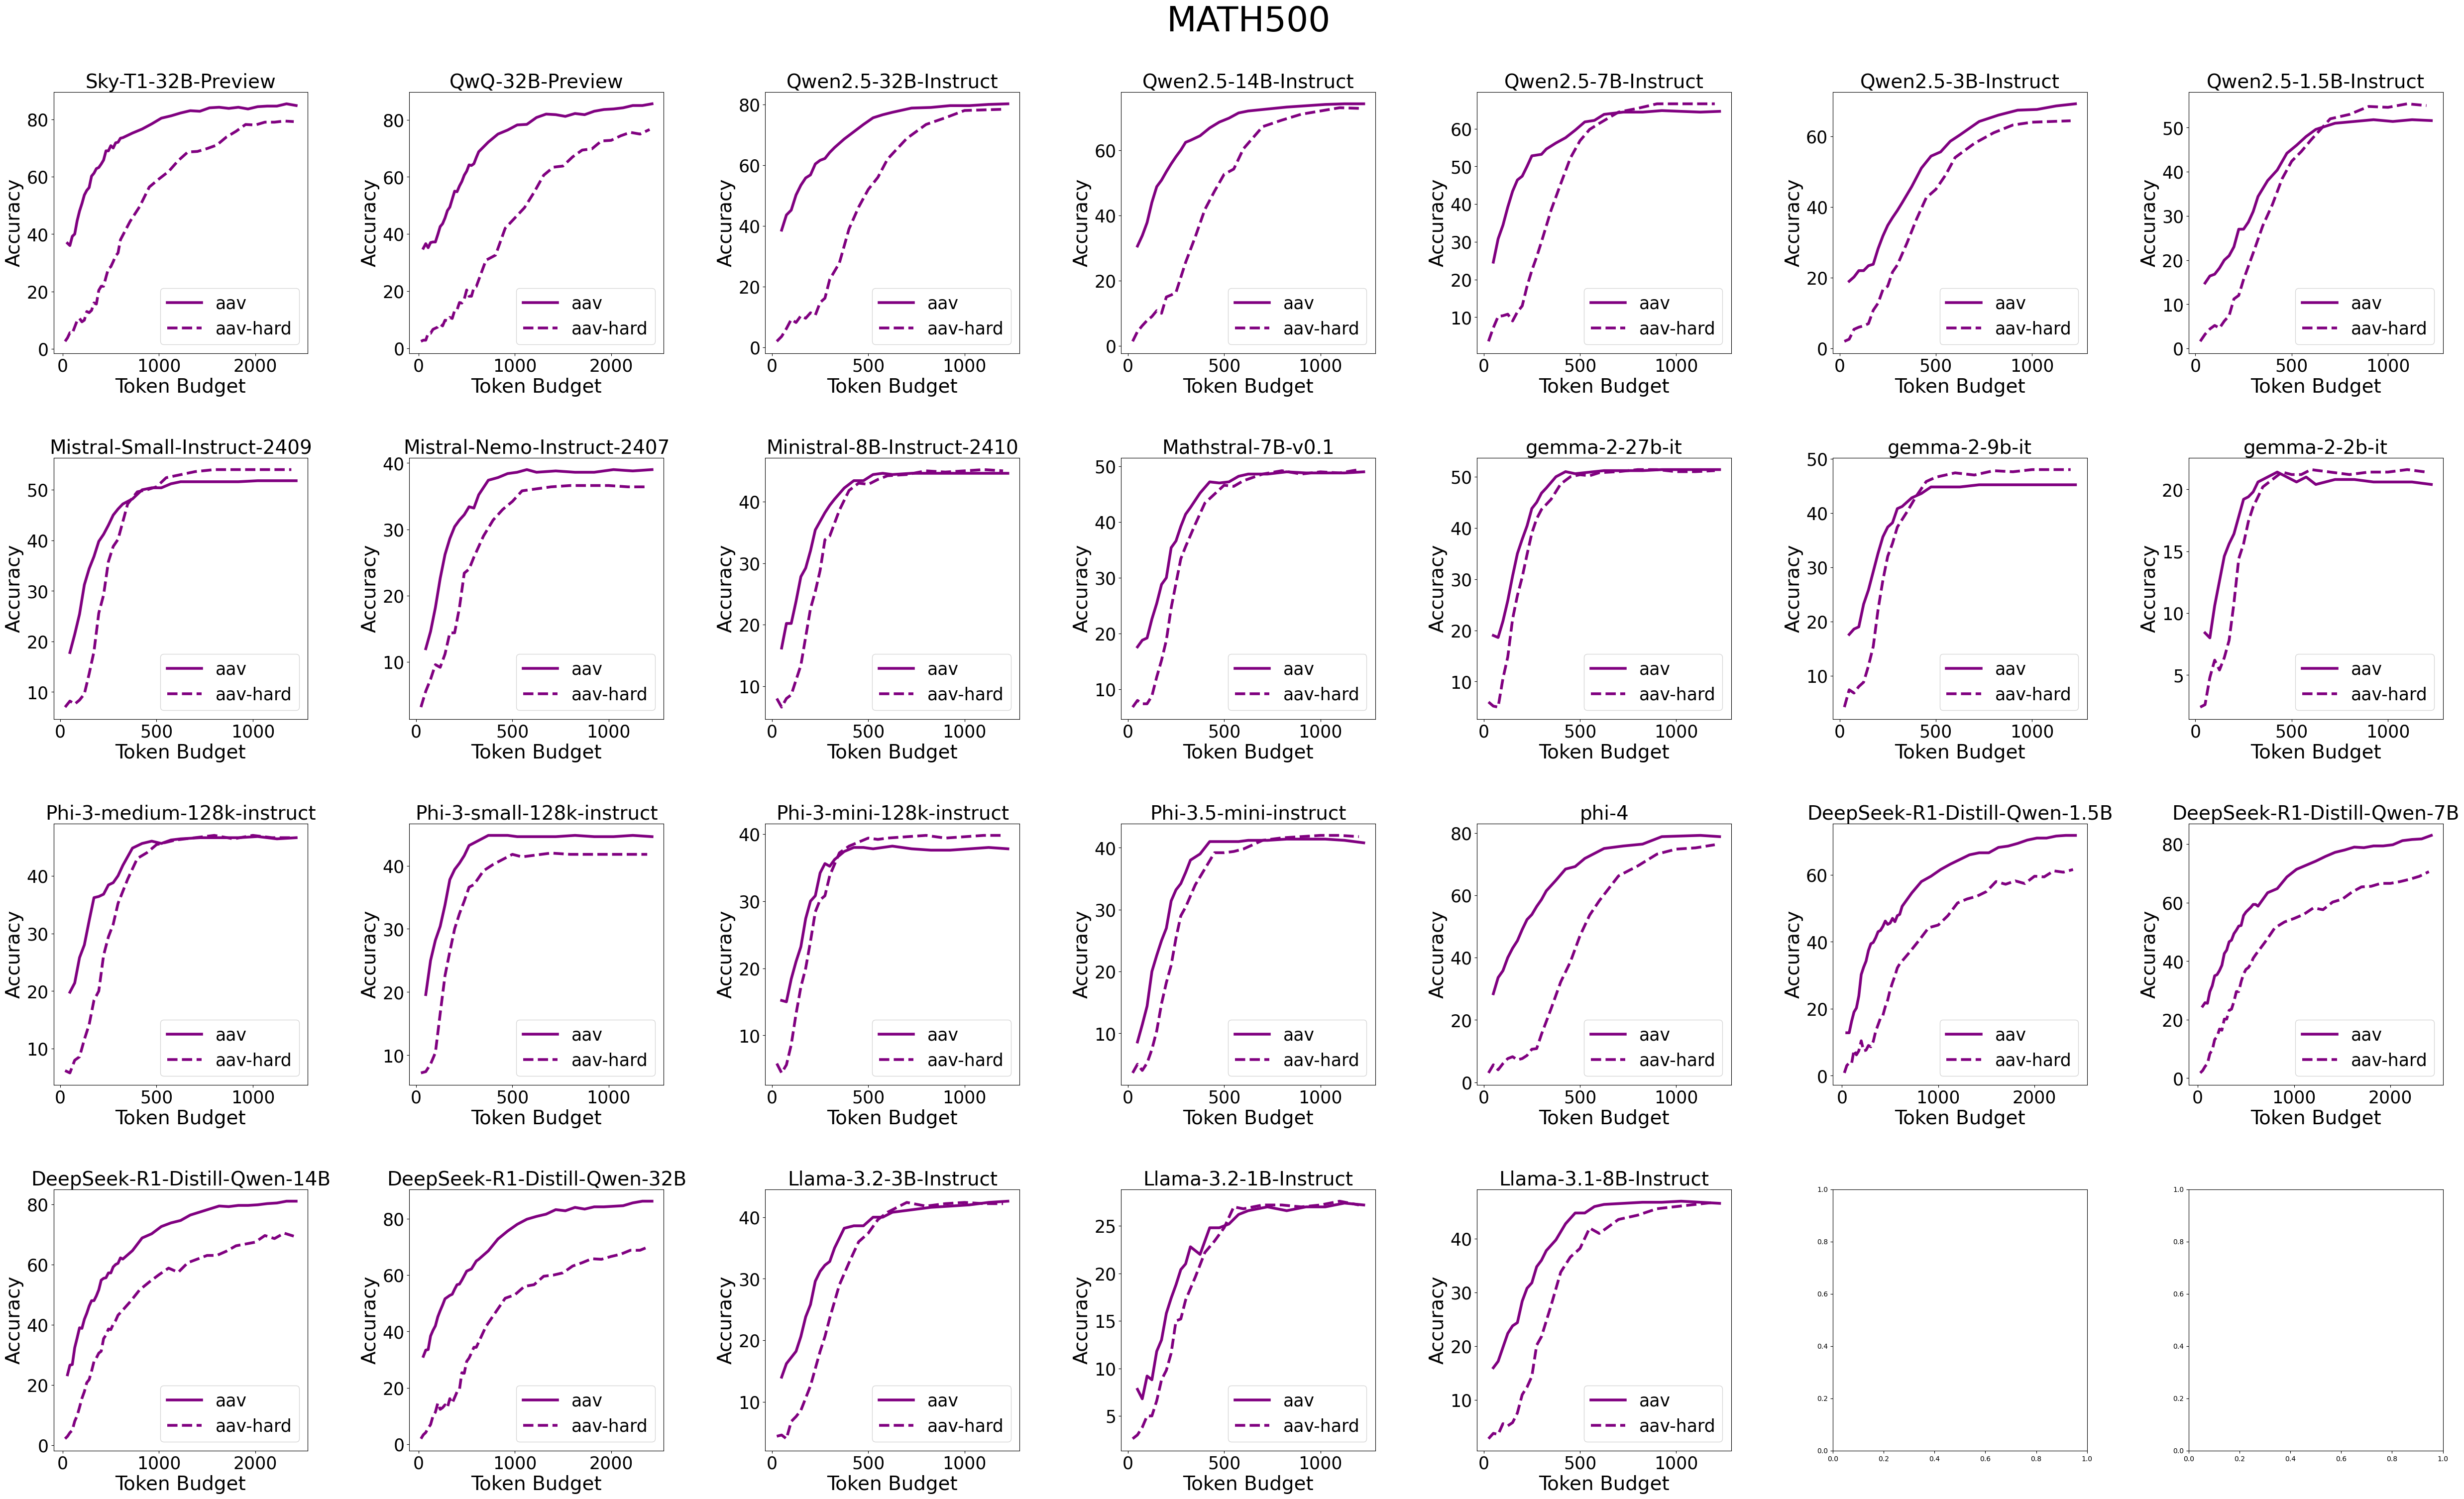

In [376]:
# Create a 2x3 subplot
fig, axs = plt.subplots(4,7, figsize=(60, 35))
marker_size = 5  # Set the desired marker size
line_width = 4   # Set the desired line width

# set the title
fig.suptitle(f"{dataset}".upper(), fontsize=50, y=0.93)


# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot all lines first without labels
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        if "sbs-budget-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=':', color="red", label="sbs-budget-hard", linewidth=line_width)
        elif "c2f-budget-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=':', color="green", label="c2f-budget-hard", linewidth=line_width)
        elif "aav-budget-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=':', color="purple", label="aav-budget-hard", linewidth=line_width)
        elif "sbs-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
            
        elif "sbs-budget" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle=':', color="red", label="sbs-budget", linewidth=line_width)
        elif "c2f-budget" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle=':', color="green", label="c2f-budget", linewidth=line_width)
        elif "aav-budget" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle=':', color="purple", label="aav-budget", linewidth=line_width)
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget", fontsize=28)
        axs[index].set_ylabel("Accuracy", fontsize=28)
        axs[index].set_title(f"{model.split('/')[-1]}", fontsize=28)
        axs[index].legend(fontsize=25)
        
        # Set y-axis and x-axis ticks
        # axs[index].set_yticks(range(0, 101, 10))  # Set y-axis interval to 10
        axs[index].tick_params(axis='both', which='major', labelsize=25)
        # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50



# Adjust layout
plt.tight_layout()
plt.subplots_adjust(
    left=0.1,      # Left margin
    right=0.9,     # Right margin
    bottom=0.1,    # Bottom margin
    top=0.88,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.4     # Height spacing between subplots
)
plt.savefig("math500.pdf")   